In [17]:
#ref : http://machine-learning-python.kspax.io/Feature_Selection/ex6_univariate_feature_selection.html
#ref : http://scikit-learn.org/stable/modules/feature_selection.html


In [29]:
#import modules 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd, numpy as np 
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import datasets, svm

Populating the interactive namespace from numpy and matplotlib


# select data 

In [3]:

iris = datasets.load_iris()

X = iris.data
Y = iris.target

# 1. DATA OVERVIEW

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df199e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dfe5cc0>]], dtype=object)

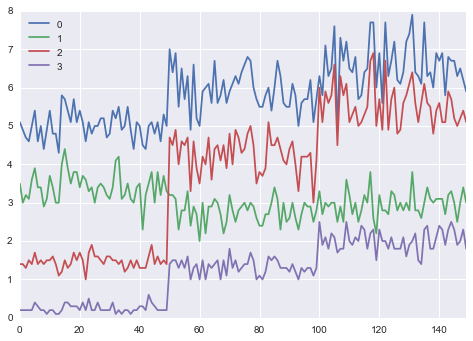

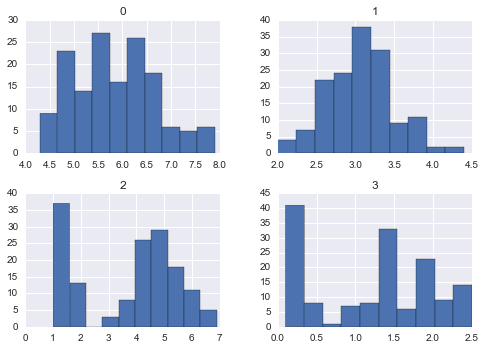

In [9]:
# line & histogram plot 
pd.DataFrame(X).plot()
pd.DataFrame(X).hist()



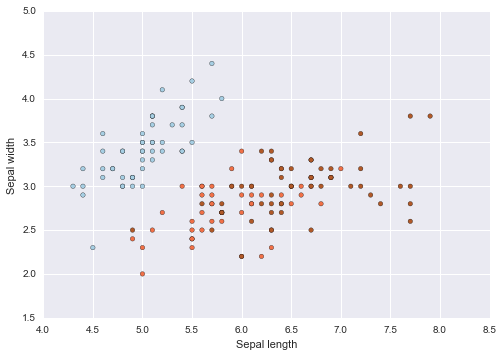

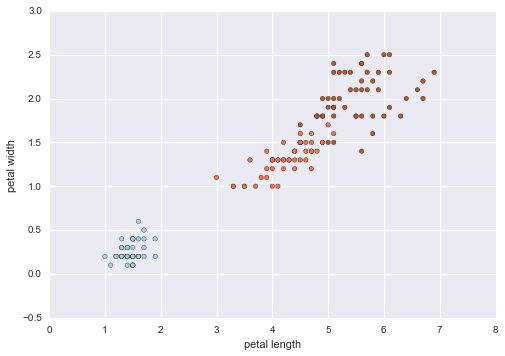

In [10]:
# scatter plot 

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=plt.cm.Paired)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


# 2. FEATURE SELECTION 

##  2.1 ExtraTreesClassifier

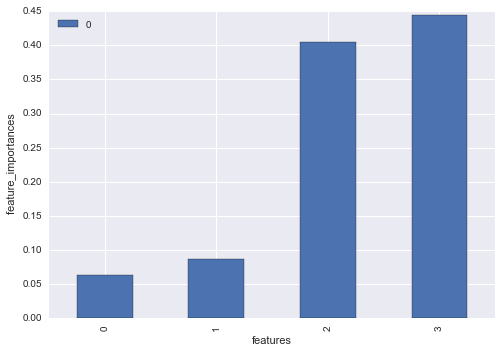

In [11]:
# ExtraTreesClassifier
iris = load_iris()
X, y = iris.data, iris.target
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_ 
pd.DataFrame(clf.feature_importances_).plot(kind='bar') 
pyplot.xlabel('features')
pyplot.ylabel(' feature_importances')

## 2.2  ADD NOISES 

<Container object of 24 artists>

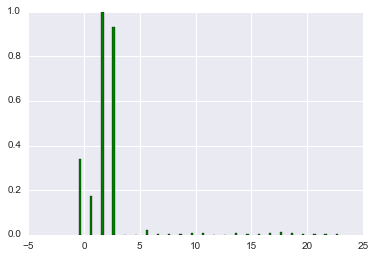

In [27]:
# add noises to data 
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target
selector = SelectPercentile(f_classif, percentile=10)
X_indices = np.arange(X.shape[-1])
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

## 2.3 Compare weights via SVM

<Container object of 24 artists>

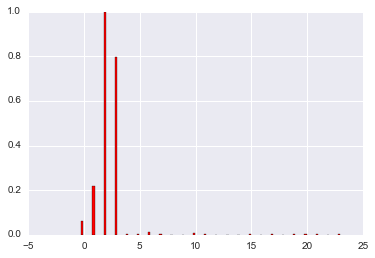

In [30]:
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')
